In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

from sklearn.impute import KNNImputer


## Data Loading

In [4]:
## Data Loading
train_df = pd.read_csv("train_land_cover_assignment.csv")
test_df = pd.read_csv("test_land_cover_assignment.csv")
# Convert the dataframe to a GeoDataFrame
train_gdf = gpd.GeoDataFrame(
    train_df
)
test_gdf = gpd.GeoDataFrame(
    test_df

)


## Data Understanding

In [5]:
train_gdf.head()

,subid,lat,lon,building,cropland,wcover,bcount,x,y,bd20,...,mlon,nppm,npps,ph20,sirm,sirs,slope,snd20,soc20,tim
0,1548937,7.387687,-4.780390,No,No,>60%,0.0,-2.714375e+06,321874.969864,1.4900,...,-4.781606,5052.299805,853.451416,6.100,0.717054,0.008259,0.729217,66.75,12.25,8.079082
1,1548936,8.690266,-5.770243,No,Yes,<30%,0.0,-2.812625e+06,474124.973063,1.2925,...,-5.771476,5316.700195,933.074402,5.575,0.717198,0.007242,1.086981,51.50,14.25,9.549431
2,1548935,8.518763,-2.808147,No,Yes,<30%,0.0,-2.495125e+06,440374.986977,1.3050,...,-2.809363,4519.700195,1186.817627,5.850,0.717171,0.006744,1.159993,47.00,14.50,10.523131
3,1548934,8.637725,-3.048867,No,No,<30%,0.0,-2.520375e+06,454875.008083,1.3275,...,-3.050085,3439.800049,910.979309,5.950,0.718244,0.007917,2.471163,62.75,12.75,9.305363
4,1548933,7.993474,-6.044227,No,No,<30%,0.0,-2.846625e+06,396624.944149,1.4200,...,-6.045455,5226.899902,802.602661,5.800,0.716653,0.007022,0.259416,55.00,13.25,15.732859


In [6]:
test_gdf.head()

,subid,lat,lon,bcount,x,y,bd20,bio1,bio12,bio7,...,mlon,nppm,npps,ph20,sirm,sirs,slope,snd20,soc20,tim
0,1548905,4.824505,-7.522892,NaN,-3.023125e+06,44125.021587,1.4075,250,2564,46,...,-7.524098,12909.700195,870.217346,5.025,0.719068,0.007398,4.093175,64.50,23.50,9.168183
1,1548829,5.457730,-5.010404,NaN,-2.749125e+06,104624.973824,1.6350,261,1378,71,...,-5.011604,12288.299805,839.143616,4.850,0.724049,0.007270,0.487844,65.75,13.00,7.896024
2,1548811,5.081743,-7.148626,NaN,-2.981625e+06,71625.015246,1.5825,247,1704,46,...,-7.149833,13374.500000,763.726135,5.100,0.720274,0.006467,2.113945,52.00,23.25,7.606022
3,1548806,5.673164,-4.171414,NaN,-2.657375e+06,125374.968207,1.7350,261,1700,68,...,-4.172613,11717.200195,814.182434,5.125,0.724026,0.007111,0.962922,59.75,15.00,8.471351
4,1548798,4.665885,-7.040600,NaN,-2.971875e+06,23875.013622,1.5925,259,1724,61,...,-7.041802,3474.800049,1809.494385,4.950,0.716632,0.007030,0.779259,70.50,15.75,13.725027


In [7]:
train_gdf.shape,test_gdf.shape

((15856, 49), (35, 46))

In [8]:
train_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 15856 entries, 0 to 15855
Data columns (total 49 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   subid     15856 non-null  int64  
 1   lat       15856 non-null  float64
 2   lon       15856 non-null  float64
 3   building  15856 non-null  object 
 4   cropland  15856 non-null  object 
 5   wcover    15856 non-null  object 
 6   bcount    15856 non-null  float64
 7   x         15856 non-null  float64
 8   y         15856 non-null  float64
 9   bd20      15811 non-null  float64
 10  bio1      15856 non-null  int64  
 11  bio12     15856 non-null  int64  
 12  bio7      15856 non-null  int64  
 13  bio15     15856 non-null  int64  
 14  cec20     15811 non-null  float64
 15  dipa      15856 non-null  float64
 16  dni       15856 non-null  float64
 17  dnlt      15856 non-null  float64
 18  dnpa      15856 non-null  float64
 19  dor1      15856 non-null  float64
 20  dor2      15856 non-

In [9]:
test_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 46 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   subid   35 non-null     int64  
 1   lat     35 non-null     float64
 2   lon     35 non-null     float64
 3   bcount  0 non-null      float64
 4   x       35 non-null     float64
 5   y       35 non-null     float64
 6   bd20    35 non-null     float64
 7   bio1    35 non-null     int64  
 8   bio12   35 non-null     int64  
 9   bio7    35 non-null     int64  
 10  bio15   35 non-null     int64  
 11  cec20   35 non-null     float64
 12  dipa    35 non-null     float64
 13  dni     35 non-null     float64
 14  dnlt    35 non-null     float64
 15  dnpa    35 non-null     float64
 16  dor1    35 non-null     float64
 17  dor2    35 non-null     float64
 18  fpara   35 non-null     float64
 19  fpars   35 non-null     float64
 20  lcc10   35 non-null     int64  
 21  lcc11   35 non-null     int64  
 

In [10]:
# A bit of statistics on the train dataset
train_gdf.describe().T


,count,mean,std,min,25%,50%,75%,max
subid,15856.0,1.540573e+06,4805.508182,1.532219e+06,1.536478e+06,1.540446e+06,1.544915e+06,1.548937e+06
lat,15856.0,7.639857e+00,1.476289,4.384086e+00,6.425833e+00,7.680448e+00,8.863336e+00,1.070230e+01
lon,15856.0,-5.557888e+00,1.500323,-8.583182e+00,-6.827483e+00,-5.652635e+00,-4.270957e+00,-2.514808e+00
bcount,15856.0,1.922931e+00,13.942902,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.470000e+02
x,15856.0,-2.795617e+06,161307.162172,-3.128125e+06,-2.932875e+06,-2.806125e+06,-2.658562e+06,-2.465125e+06
y,15856.0,3.543322e+05,167481.073066,-6.374980e+03,2.173750e+05,3.588750e+05,4.921250e+05,7.043751e+05
bd20,15811.0,1.436390e+00,0.163676,1.057500e+00,1.287500e+00,1.427500e+00,1.575000e+00,1.865000e+00
bio1,15856.0,2.589067e+02,6.578450,1.980000e+02,2.550000e+02,2.590000e+02,2.630000e+02,2.770000e+02
bio12,15856.0,1.276894e+03,253.890839,8.020000e+02,1.096000e+03,1.225000e+03,1.408000e+03,2.586000e+03
bio7,15856.0,6.590918e+01,13.210307,4.300000e+01,5.700000e+01,6.200000e+01,7.300000e+01,1.050000e+02


In [11]:
# Statistics on the test dataset
test_gdf.describe().T

,count,mean,std,min,25%,50%,75%,max
subid,35.0,1.545269e+06,5136.101636,1.534108e+06,1.543100e+06,1.548461e+06,1.548604e+06,1.548905e+06
lat,35.0,5.737482e+00,1.240670,4.665885e+00,5.023485e+00,5.399041e+00,5.675503e+00,9.389813e+00
lon,35.0,-5.671112e+00,1.277960,-7.703526e+00,-7.056182e+00,-5.647431e+00,-4.932149e+00,-3.307357e+00
bcount,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x,35.0,-2.818725e+06,141959.505621,-3.034875e+06,-2.973000e+06,-2.818125e+06,-2.738625e+06,-2.547125e+06
y,35.0,1.391607e+05,136837.740316,2.387501e+04,6.374996e+04,1.003749e+05,1.256250e+05,5.418750e+05
bd20,35.0,1.582500e+00,0.132729,1.235000e+00,1.565000e+00,1.595000e+00,1.663750e+00,1.735000e+00
bio1,35.0,2.571429e+02,5.041842,2.470000e+02,2.530000e+02,2.590000e+02,2.605000e+02,2.690000e+02
bio12,35.0,1.568800e+03,333.588228,9.510000e+02,1.365500e+03,1.576000e+03,1.745500e+03,2.564000e+03
bio7,35.0,6.468571e+01,11.362403,4.600000e+01,5.500000e+01,6.700000e+01,7.300000e+01,9.100000e+01


In [12]:
# Categories in the categorical columns
categorical_cols = train_gdf.select_dtypes(include=['object']).columns
for col in categorical_cols:
       print(f"Column: {col}")
       print(train_gdf[col].unique())
       print("\n")

Column: building
['No' 'Yes']


Column: cropland
['No' 'Yes']


Column: wcover
['>60%' '<30%' '>30%']




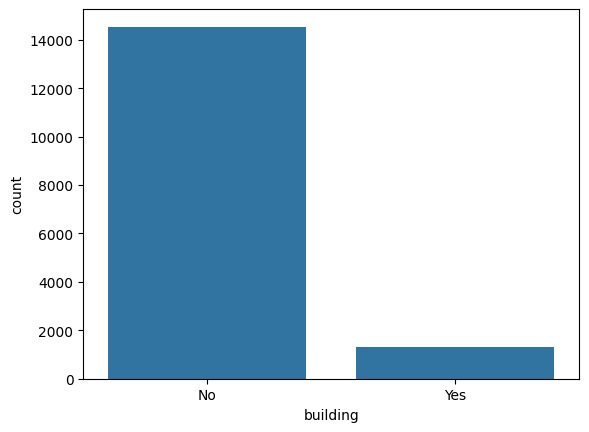

In [13]:
# Distribution of building column
sns.countplot(x='building',data=train_gdf)
plt.show()

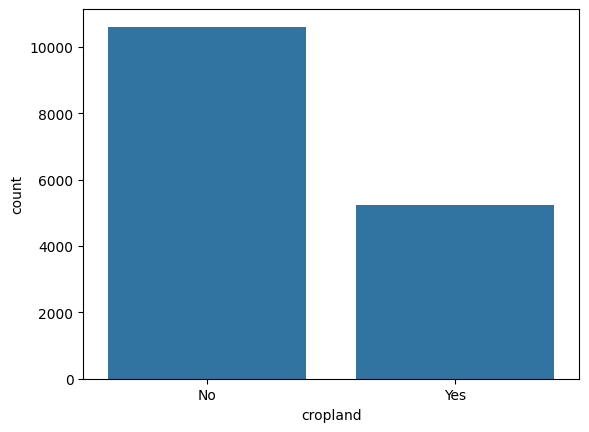

In [15]:

# Distribution of cropland column
sns.countplot(x='cropland',data=train_gdf)
plt.show()


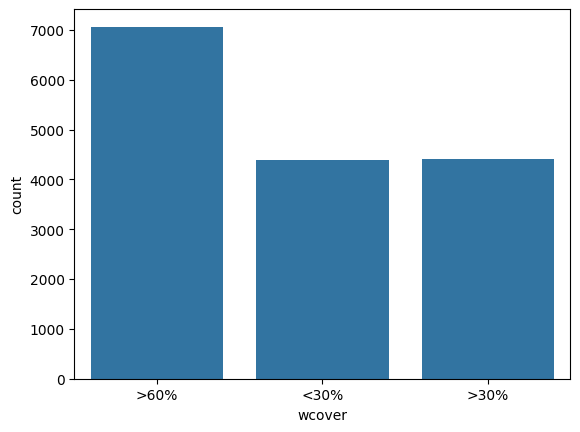

In [14]:
# Distribution of cropland column
sns.countplot(x='wcover',data=train_gdf)
plt.show()

## Data Preprocessing

In [17]:
# Check for missing values in train dataset
train_gdf.isnull().sum()

,0
subid,0
lat,0
lon,0
building,0
cropland,0
wcover,0
bcount,0
x,0
y,0
bd20,45


In [18]:
# Check for missing values in test dataset
test_gdf.isnull().sum()

,0
subid,0
lat,0
lon,0
bcount,35
x,0
y,0
bd20,0
bio1,0
bio12,0
bio7,0


### Checking for patterns in the missing dataset

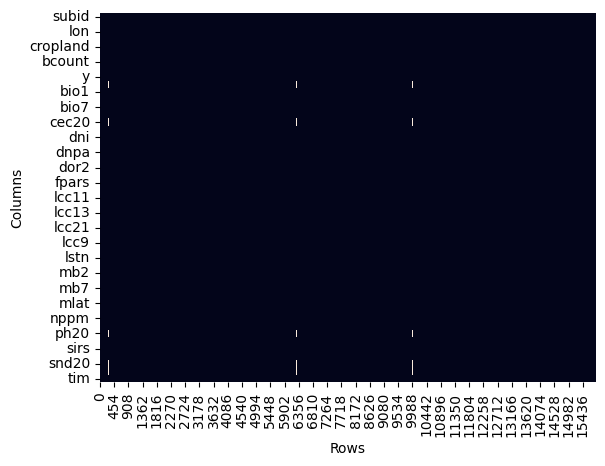

In [19]:
ax = plt.axes()
sns.heatmap(train_gdf.isna().transpose(), cbar=False, ax=ax)
plt. xlabel("Rows")
plt.ylabel("Columns")
plt.show()



In [20]:
data_missing = train_gdf[~(train_gdf["bio1"].isna()) &
      (train_gdf["cec20"].isna()) &
      (train_gdf["ph20"].isna()) &
      (train_gdf["snd20"].isna())

]

data_missing

,subid,lat,lon,building,cropland,wcover,bcount,x,y,bd20,...,mlon,nppm,npps,ph20,sirm,sirs,slope,snd20,soc20,tim
274,1548652,9.816674,-7.556612,No,Yes,>30%,0.0,-2.995125e+06,611624.969164,NaN,...,-7.557865,3167.199951,649.226501,NaN,0.719814,0.008340,1.159993,NaN,NaN,10.925166
1015,1547878,5.314898,-4.463822,Yes,Yes,<30%,16.0,-2.690625e+06,86124.977145,NaN,...,-4.465019,6517.799805,767.447388,NaN,0.714374,0.007009,1.361649,NaN,NaN,12.056894
1075,1547818,5.288401,-4.462756,Yes,Yes,>60%,4.0,-2.690625e+06,83125.049204,NaN,...,-4.463953,0.000000,0.000000,NaN,0.713089,0.007029,3.180642,NaN,NaN,9.231565
1602,1547290,8.018872,-2.876379,No,Yes,>30%,0.0,-2.505375e+06,384375.019721,NaN,...,-2.877592,3601.600098,1178.735352,NaN,0.717368,0.006791,2.155771,NaN,NaN,10.159265
1783,1547108,5.174432,-5.313108,No,Yes,>60%,0.0,-2.783125e+06,73875.016724,NaN,...,-5.314307,0.000000,0.000000,NaN,0.000000,0.000000,0.786595,NaN,NaN,9.335908
1994,1546893,8.617977,-5.562886,No,No,>60%,0.0,-2.790875e+06,464874.941780,NaN,...,-5.564117,3951.300049,764.971619,NaN,0.713890,0.006768,0.939636,NaN,NaN,12.565793
2048,1546839,5.576609,-3.244662,Yes,Yes,>60%,2.0,-2.557375e+06,110625.051831,NaN,...,-3.245856,11518.700195,838.168518,NaN,0.000000,0.000000,0.869811,NaN,NaN,NaN
2058,1546829,5.315848,-4.674036,No,Yes,>60%,0.0,-2.713375e+06,87124.978607,NaN,...,-4.675234,6223.500000,742.037476,NaN,0.000000,0.000000,2.437808,NaN,NaN,9.594395
2341,1546543,6.741978,-6.974051,No,No,>60%,0.0,-2.954125e+06,259375.045445,NaN,...,-6.975271,0.000000,0.000000,NaN,0.718933,0.006714,2.179202,NaN,NaN,11.065211
2425,1546459,5.286561,-3.913424,Yes,Yes,<30%,12.0,-2.631125e+06,80625.033794,NaN,...,-3.914619,0.000000,0.000000,NaN,0.000000,0.000000,0.845901,NaN,NaN,10.865295


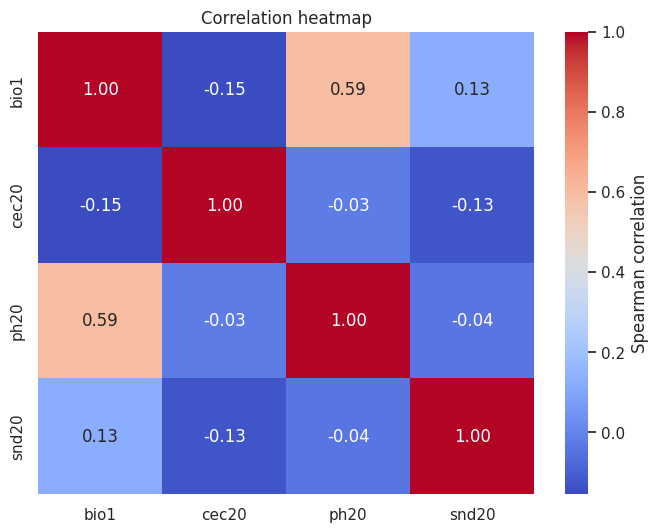

In [22]:
columns_of_interest = ["bio1", "cec20", "ph20", "snd20"]
correlation_matrix = train_gdf[columns_of_interest].corr(method = "spearman")

sns.set_theme(style="white")
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm",
                      cbar_kws={"label": "Spearman correlation"})
heatmap.set_title("Correlation heatmap")
plt.show()




The heatmap shows that among the features there is low correlation , with the exceptio of, bio1 (temperature) and ph20 (soil pH) stand out for having a moderate correlation, while the others appear relatively uncorrelated in your dataset.


In [23]:
data_missing.info()


<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 274 to 15847
Data columns (total 49 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   subid     45 non-null     int64  
 1   lat       45 non-null     float64
 2   lon       45 non-null     float64
 3   building  45 non-null     object 
 4   cropland  45 non-null     object 
 5   wcover    45 non-null     object 
 6   bcount    45 non-null     float64
 7   x         45 non-null     float64
 8   y         45 non-null     float64
 9   bd20      0 non-null      float64
 10  bio1      45 non-null     int64  
 11  bio12     45 non-null     int64  
 12  bio7      45 non-null     int64  
 13  bio15     45 non-null     int64  
 14  cec20     0 non-null      float64
 15  dipa      45 non-null     float64
 16  dni       45 non-null     float64
 17  dnlt      45 non-null     float64
 18  dnpa      45 non-null     float64
 19  dor1      45 non-null     float64
 20  dor2      45 non-null     float64


In [24]:
# Deleting the missing values
train_gdf = train_gdf[~(train_gdf["bio1"].isna()) &
      ~(train_gdf["cec20"].isna()) &
      ~(train_gdf["ph20"].isna()) &
      ~(train_gdf["snd20"].isna())

]

In [25]:
train_gdf.info()


<class 'pandas.core.frame.DataFrame'>
Index: 15811 entries, 0 to 15855
Data columns (total 49 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   subid     15811 non-null  int64  
 1   lat       15811 non-null  float64
 2   lon       15811 non-null  float64
 3   building  15811 non-null  object 
 4   cropland  15811 non-null  object 
 5   wcover    15811 non-null  object 
 6   bcount    15811 non-null  float64
 7   x         15811 non-null  float64
 8   y         15811 non-null  float64
 9   bd20      15811 non-null  float64
 10  bio1      15811 non-null  int64  
 11  bio12     15811 non-null  int64  
 12  bio7      15811 non-null  int64  
 13  bio15     15811 non-null  int64  
 14  cec20     15811 non-null  float64
 15  dipa      15811 non-null  float64
 16  dni       15811 non-null  float64
 17  dnlt      15811 non-null  float64
 18  dnpa      15811 non-null  float64
 19  dor1      15811 non-null  float64
 20  dor2      15811 non-null  float64

## Deep dive into lstd (Average day-time land surface temp. (deg. C , 2001-2020)) and lstn columns (Average night-time land surface temp. (deg. C, 2001-2020))


In [27]:
# Identify the rows with missing values in lstd or lstn
missing_mask = train_gdf['lstd'].isnull() | train_gdf['lstn'].isnull()
missing_rows = train_gdf[missing_mask]
missing_rows[['subid', 'lat', 'lon', 'lstd', 'lstn']]

,subid,lat,lon,lstd,lstn
1591,1547301,5.201036,-3.336148,NaN,NaN
1785,1547106,5.158228,-4.750843,NaN,NaN
2633,1546251,5.233256,-4.518274,NaN,NaN
6733,1541643,5.225401,-5.308266,NaN,NaN
6850,1541525,5.211316,-5.157389,NaN,NaN
6914,1541461,5.307599,-4.124199,NaN,NaN
8800,1539574,5.302855,-4.431010,NaN,NaN
8833,1539541,5.210890,-4.346546,NaN,NaN
9698,1538676,5.327656,-4.120380,NaN,NaN
10601,1537772,4.432429,-7.323420,NaN,NaN


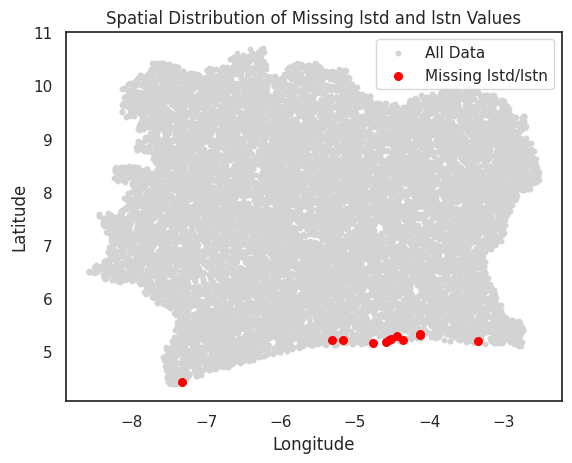

In [29]:
# Investigate spatial patterns by plotting the missing rows on a map
plt.figure()
# Plot all points in light gray
plt.scatter(train_gdf['lon'], train_gdf['lat'], c='lightgray', s=10, label='All Data')
# Highlight the points with missing lstd/lstn in red
plt.scatter(missing_rows['lon'], missing_rows['lat'], c='red', s=30, label='Missing lstd/lstn')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Spatial Distribution of Missing lstd and lstn Values")
plt.legend()
plt.show()

The points are along or near the southern/southwestern coast, with one row farther west at (4.432429, -7.323420).
This could be caused by Persistent cloud cover, coastal influence, or a data-source retrieval issue (e.g., MODIS or other satellite-based products) might explain why day/night LST values were not retrieved for those specific pixels.

We will use KNNImputer, which will include latitude (lat), longitude (lon), and elevation (mdem), the imputer will look for the closest points and average their known LST values. This helps capture coastal vs inland differences better

In [32]:
# Select relevant columns
cols = ['lat', 'lon', 'mdem', 'bio1', 'mb1', 'mb7', 'lstd', 'lstn']

# Create a copy
df_knn = train_gdf[cols].copy()

# Initializee the KNN Imputer
imputer = KNNImputer(n_neighbors=5, weights='distance')

# train the Imputer
imputed_data = imputer.fit_transform(df_knn)
# Have the imputed columns in the original dataframe
df_knn_imputed = pd.DataFrame(imputed_data, columns=cols, index=train_gdf.index)
train_gdf['lstd'] = df_knn_imputed['lstd']
train_gdf['lstn'] = df_knn_imputed['lstn']


In [34]:
# Checking if there are any missing values
train_gdf.isna().sum()



,0
subid,0
lat,0
lon,0
building,0
cropland,0
wcover,0
bcount,0
x,0
y,0
bd20,0


In [35]:
# Veryfying the missing values have been imputed
train_gdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15811 entries, 0 to 15855
Data columns (total 49 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   subid     15811 non-null  int64  
 1   lat       15811 non-null  float64
 2   lon       15811 non-null  float64
 3   building  15811 non-null  object 
 4   cropland  15811 non-null  object 
 5   wcover    15811 non-null  object 
 6   bcount    15811 non-null  float64
 7   x         15811 non-null  float64
 8   y         15811 non-null  float64
 9   bd20      15811 non-null  float64
 10  bio1      15811 non-null  int64  
 11  bio12     15811 non-null  int64  
 12  bio7      15811 non-null  int64  
 13  bio15     15811 non-null  int64  
 14  cec20     15811 non-null  float64
 15  dipa      15811 non-null  float64
 16  dni       15811 non-null  float64
 17  dnlt      15811 non-null  float64
 18  dnpa      15811 non-null  float64
 19  dor1      15811 non-null  float64
 20  dor2      15811 non-null  float64

## Deep Dive into lat, lon and mlat and mlon columns

In [36]:
# A subset of the four columns
train_gdf[["lat","lon", "mlat","mlon"]].head(10)

,lat,lon,mlat,mlon
0,7.387687,-4.780390,7.388742,-4.781606
1,8.690266,-5.770243,8.691314,-5.771476
2,8.518763,-2.808147,8.519824,-2.809363
3,8.637725,-3.048867,8.638784,-3.050085
4,7.993474,-6.044227,7.994523,-6.045455
5,7.219553,-3.349626,7.220614,-3.350835
6,6.794609,-4.073888,6.795668,-4.075096
7,9.625816,-3.809691,9.626870,-3.810922
8,8.944514,-3.142914,8.945573,-3.144136
9,7.737685,-6.434330,7.738732,-6.435557


### Let compare the four columns, and see the difference. We will use Mean Absolute difference in latitude and longitude

In [37]:
# Compare lat vs. mlat
lat_diff = (train_gdf['lat'] - train_gdf['mlat']).abs()
lon_diff = (train_gdf['lon'] - train_gdf['mlon']).abs()

print("Mean absolute difference in latitude:", lat_diff.mean())
print("Mean absolute difference in longitude:", lon_diff.mean())


Mean absolute difference in latitude: 0.001051072155990653
Mean absolute difference in longitude: 0.0012222703553230398


The difference in latitude and longitude are too smll. According to GIS StackExchanage , practitionaers have noted that when differences are on the order of 0.001 (which typically equates to roughly 100-110 meters at most) it isnt necessary to switch coordinate systems unless the analysis demands extremely high spatial precision.

This approach is supported by GIS professionals who point out that differences at the 0.001° level are generally negligible for most analyses, as detailed in the Wikipedia article on Decimal Degrees and discussions on GIS StackExchange.(https://en.wikipedia.org/wiki/Decimal_degrees


In [41]:
# We drop the mlat and mlon
train_gdf = train_gdf.drop(columns=['mlat', 'mlon'])
test_gdf = test_gdf.drop(columns=['mlat', 'mlon'])

## Deep Dive into the Columns with no Description

In [42]:
## A subset of the columns with no description
train_gdf[["x","y", "bcount","dnlt","nppm","sirs"]].head(10)


,x,y,bcount,dnlt,nppm,sirs
0,-2.714375e+06,321874.969864,0.0,0.500000,5052.299805,0.008259
1,-2.812625e+06,474124.973063,0.0,3.913119,5316.700195,0.007242
2,-2.495125e+06,440374.986977,0.0,7.615773,4519.700195,0.006744
3,-2.520375e+06,454875.008083,0.0,7.591113,3439.800049,0.007917
4,-2.846625e+06,396624.944149,0.0,0.000000,5226.899902,0.007022
5,-2.560875e+06,296374.982792,0.0,1.250000,4088.899902,0.007156
6,-2.641375e+06,251625.046786,0.0,0.000000,5630.600098,0.007713
7,-2.595875e+06,569875.044968,0.0,3.691206,2612.500000,0.007078
8,-2.528625e+06,489875.029340,0.0,3.010399,3277.800049,0.007249
9,-2.890125e+06,369625.020345,0.0,3.250000,5506.899902,0.006950


In [43]:
# Checking categories in the bcount
train_gdf["bcount"].value_counts()


,count
bcount,
0.0,14509
1.0,277
2.0,156
3.0,128
4.0,70
...,...
142.0,1
84.0,1
90.0,1


In [44]:
# Our undocumented columns of interest:
undoc_cols = ['x', 'y', 'bcount', 'dnlt', 'nppm', 'sirs']

In [45]:
# Compute the Pearson correlation matrix
corr_matrix = train_gdf[undoc_cols].corr(method='pearson')
print("Correlation matrix:\n", corr_matrix)

Correlation matrix:
                x         y    bcount      dnlt      nppm      sirs
x       1.000000 -0.004533 -0.020441  0.006522 -0.305928  0.042232
y      -0.004533  1.000000 -0.053686  0.030446 -0.464429 -0.128165
bcount -0.020441 -0.053686  1.000000 -0.076438 -0.030680  0.006147
dnlt    0.006522  0.030446 -0.076438  1.000000  0.093515 -0.055916
nppm   -0.305928 -0.464429 -0.030680  0.093515  1.000000  0.074080
sirs    0.042232 -0.128165  0.006147 -0.055916  0.074080  1.000000


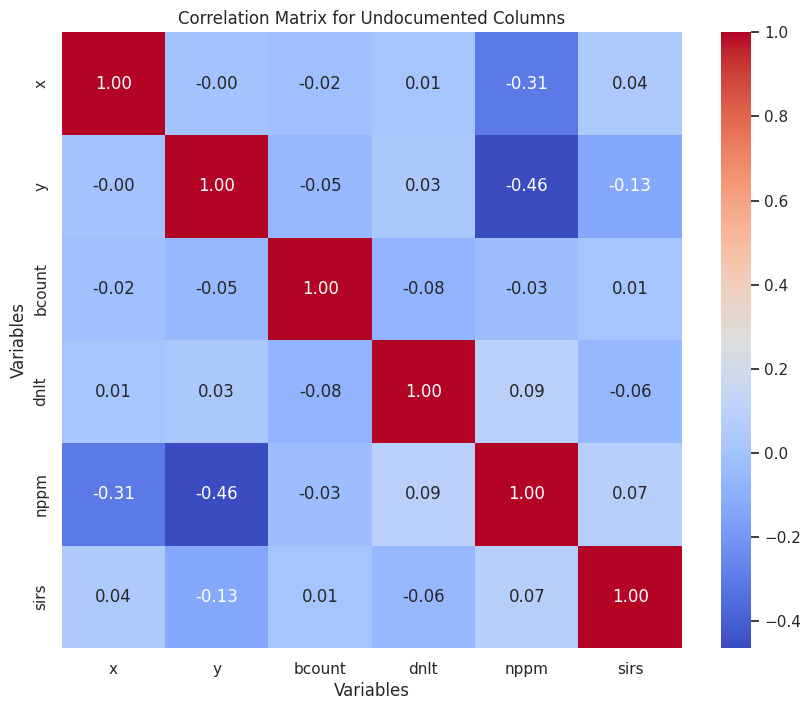

In [46]:
# Visualize the matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Undocumented Columns")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()


The columns do not contain strong correlation, which means they are independent. We will retain the columns, and then evaluate their significance on the model perfomance, using feature importance.


## Checking for Duplicates

In [47]:
## Checking for Duplicates
train_gdf.duplicated().sum()



0

In [48]:
test_gdf.duplicated().sum()


0

In [74]:
train_gdf.head()

,subid,lat,lon,bcount,x,y,bd20,bio1,bio12,bio7,...,npps,ph20,sirm,sirs,slope,snd20,soc20,tim,landcover,landcover_encoded
0,1548937,7.387687,-4.780390,0.0,-2.714375e+06,321874.969864,1.4900,262,1006,58,...,853.451416,6.100,0.717054,0.008259,0.729217,66.75,12.25,8.079082,woody,2
1,1548936,8.690266,-5.770243,0.0,-2.812625e+06,474124.973063,1.2925,257,1118,70,...,933.074402,5.575,0.717198,0.007242,1.086981,51.50,14.25,9.549431,cropland,1
2,1548935,8.518763,-2.808147,0.0,-2.495125e+06,440374.986977,1.3050,265,930,66,...,1186.817627,5.850,0.717171,0.006744,1.159993,47.00,14.50,10.523131,cropland,1
3,1548934,8.637725,-3.048867,0.0,-2.520375e+06,454875.008083,1.3275,263,875,67,...,910.979309,5.950,0.718244,0.007917,2.471163,62.75,12.75,9.305363,cropland,1
4,1548933,7.993474,-6.044227,0.0,-2.846625e+06,396624.944149,1.4200,260,1073,60,...,802.602661,5.800,0.716653,0.007022,0.259416,55.00,13.25,15.732859,cropland,1


In [50]:
def get_landcover(row):
    # Prioritize building if "Yes"
    if str(row['building']).strip().lower() == 'yes':
        return 'building'
    # Next, prioritize cropland if "Yes"
    elif str(row['cropland']).strip().lower() == 'yes':
        return 'cropland'
    # Next, if wcover is clearly >60%, assign woody
    elif '>60' in str(row['wcover']):
        return 'woody'
    else:
        # Use wcover to decide further:
        if '>30' in str(row['wcover']):
            return 'woody'
        else:
            return 'cropland'

# Create a landcover column
train_gdf['landcover'] = train_gdf.apply(get_landcover, axis=1)
train_gdf['landcover'].value_counts()


,count
landcover,
woody,7511
cropland,6992
building,1308


## Feature Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Perform label encoding on landcover column
label_encoder = LabelEncoder()
train_gdf['landcover_encoded'] = label_encoder.fit_transform(train_gdf['landcover'])

In [76]:
# Drop the original target columns if no longer needed
train_gdf = train_gdf.drop(columns=['building', 'cropland', 'wcover'])
train_gdf.columns


In [77]:
test_gdf.columns


Index(['subid', 'lat', 'lon', 'bcount', 'x', 'y', 'bd20', 'bio1', 'bio12',
       'bio7', 'bio15', 'cec20', 'dipa', 'dni', 'dnlt', 'dnpa', 'dor1', 'dor2',
       'fpara', 'fpars', 'lcc10', 'lcc11', 'lcc12', 'lcc13', 'lcc14', 'lcc21',
       'lcc8', 'lcc9', 'lstd', 'lstn', 'mb1', 'mb2', 'mb3', 'mb7', 'mdem',
       'nppm', 'npps', 'ph20', 'sirm', 'sirs', 'slope', 'snd20', 'soc20',
       'tim'],
      dtype='object')

In [78]:
train_gdf.shape, test_gdf.shape

((15811, 46), (35, 44))

In [79]:
# Saving the clean dataset
train_gdf.to_csv('clean_train.csv',index=False)
test_gdf.to_csv('clean_test.csv', index=False)


## Exploratory Data Analysis

In [58]:
train_gdf.head()

,subid,lat,lon,bcount,x,y,bd20,bio1,bio12,bio7,...,nppm,npps,ph20,sirm,sirs,slope,snd20,soc20,tim,landcover
0,1548937,7.387687,-4.780390,0.0,-2.714375e+06,321874.969864,1.4900,262,1006,58,...,5052.299805,853.451416,6.100,0.717054,0.008259,0.729217,66.75,12.25,8.079082,woody
1,1548936,8.690266,-5.770243,0.0,-2.812625e+06,474124.973063,1.2925,257,1118,70,...,5316.700195,933.074402,5.575,0.717198,0.007242,1.086981,51.50,14.25,9.549431,cropland
2,1548935,8.518763,-2.808147,0.0,-2.495125e+06,440374.986977,1.3050,265,930,66,...,4519.700195,1186.817627,5.850,0.717171,0.006744,1.159993,47.00,14.50,10.523131,cropland
3,1548934,8.637725,-3.048867,0.0,-2.520375e+06,454875.008083,1.3275,263,875,67,...,3439.800049,910.979309,5.950,0.718244,0.007917,2.471163,62.75,12.75,9.305363,cropland
4,1548933,7.993474,-6.044227,0.0,-2.846625e+06,396624.944149,1.4200,260,1073,60,...,5226.899902,802.602661,5.800,0.716653,0.007022,0.259416,55.00,13.25,15.732859,cropland


In [60]:
# Ensure the 'landcover' column is treated as categorical
train_gdf['landcover'] = train_gdf['landcover'].astype('category')

##  How are the land cover classes distributed geographically?
In this Research question, we are looking at how the land cover classes(building, cropland,woody vegetation) are distributed geographicallly across the region.

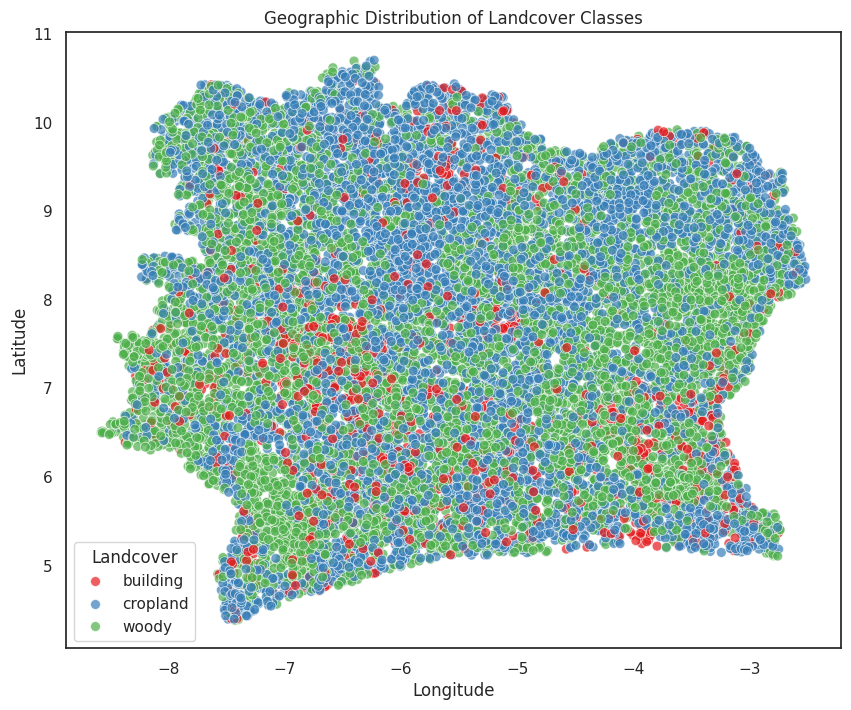

In [61]:
# Question: How are the land cover classes distributed geographically?
plt.figure(figsize=(10, 8))
sns.scatterplot(data=train_gdf, x='lon', y='lat', hue='landcover', palette='Set1', alpha=0.7, s=50)
plt.title("Geographic Distribution of Landcover Classes")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Landcover")
plt.show()

From this scatter plot :

* Buildings (red) appear relatively sparse and localized in clusters, reflecting the fact that "building" was the smallest class in the dataset. These points likely represent urban or developed areas.

* Cropland (blue) and Woody (green) collectively dominate most of the region. While there is some intermixing, you can see broad areas where cropland or woody vegetation are more prevalent, indicating that farmland and forested zones are distributed throughout the region.

* There is no single, stark boundary between cropland and woody vegetation, suggesting a gradual transition or mosaic of these land cover types. Meanwhile, the scattered nature of building points underscores their minority status in the dataset.

## 2. Which environmental/remote sensing features correlate with land cover classes?
The correlation matrix which show how key environmental features relate to one another.

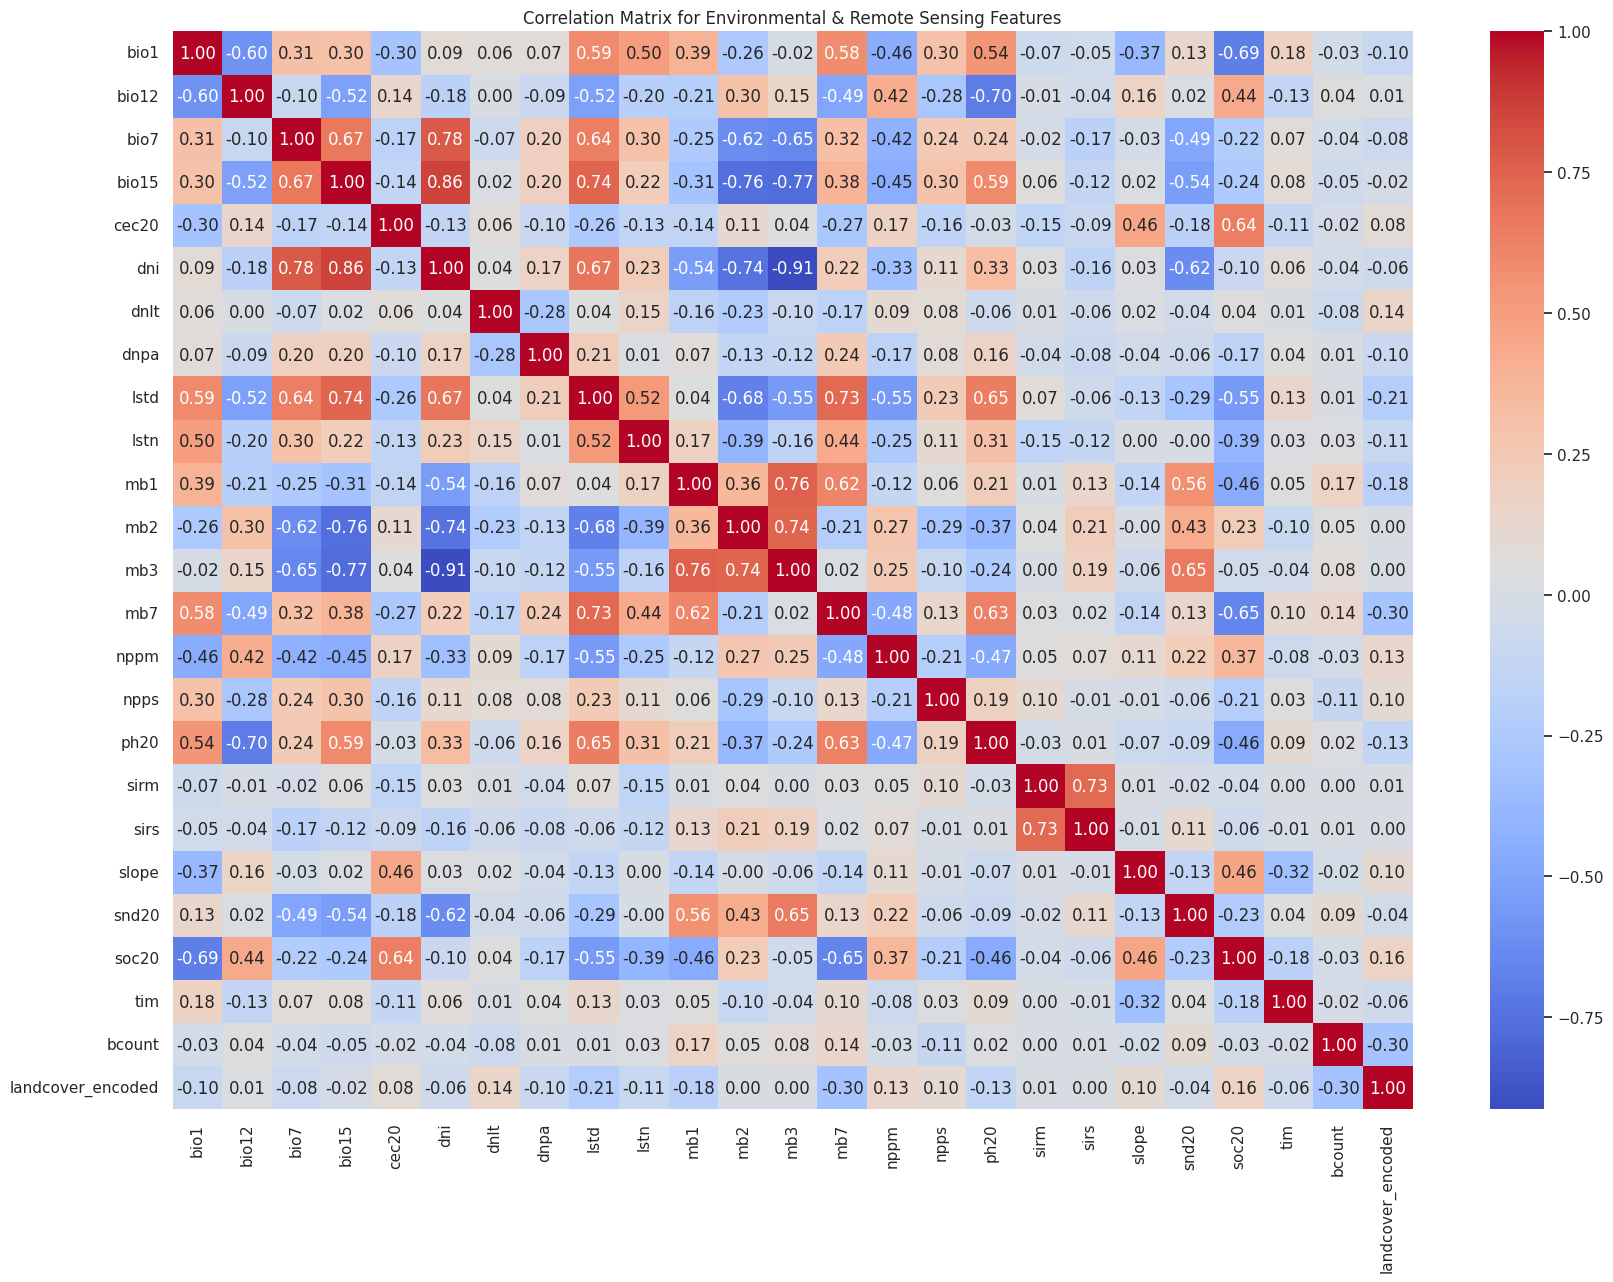

In [100]:
# Extract evironmental features
env_features = ['bio1', 'bio12', 'bio7', 'bio15', 'cec20', 'dni', 'dnlt', 'dnpa',
                'lstd', 'lstn', 'mb1', 'mb2', 'mb3', 'mb7', 'nppm', 'npps', 'ph20',
                'sirm', 'sirs', 'slope', 'snd20', 'soc20', 'tim', 'bcount','landcover_encoded']
corr_matrix =train_gdf[env_features].corr()

plt.figure(figsize=(20, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Environmental & Remote Sensing Features")
plt.show()

bcount shows the strongest positive correlation with landcover_encoded. This aligns with our previous findings that building density is a major driver of land cover classification (especially for the “building” label).

Some variables (e.g., certain remote-sensing features like dnlt, mb2, or topographic variables like slope) have modest positive or negative correlations with the target. This suggests they provide useful—but not overwhelming—signal in distinguishing among the “cropland,” “woody,” and “building” classes.

Several features (e.g., some soil properties or climate variables) show near-zero correlation with landcover_encoded. They may still contribute in interaction with other features, but individually they don’t strongly separate the classes.

In [91]:
# 2. Environmental and Remote Sensing Influences with Encoded Target
env_features = [
    'bio1', 'bio12', 'bio7', 'bio15', 'cec20', 'dni', 'dnlt', 'dnpa',
    'lstd', 'lstn', 'mb1', 'mb2', 'mb3', 'mb7', 'nppm', 'npps', 'ph20',
    'sirm', 'sirs', 'slope', 'snd20', 'soc20', 'tim', 'bcount'
]

# Include the encoded target in the correlation
if 'landcover_encoded' in train_gdf.columns:
    features_with_target = env_features + ['landcover_encoded']
    corr_matrix_target = train_gdf[features_with_target].corr()

    # Extract correlations with landcover_encoded
    target_corr = corr_matrix_target['landcover_encoded'].sort_values(ascending=False)
    print("Correlation of environmental features with the encoded landcover:\n", target_corr)



Correlation of environmental features with the encoded landcover:
 landcover_encoded    1.000000
soc20                0.162818
dnlt                 0.143307
nppm                 0.131015
npps                 0.097181
slope                0.097052
cec20                0.082928
bio12                0.014282
sirm                 0.012447
mb2                  0.003065
sirs                 0.000564
mb3                  0.000222
bio15               -0.021449
snd20               -0.042577
dni                 -0.060431
tim                 -0.060650
bio7                -0.083966
dnpa                -0.095509
bio1                -0.101413
lstn                -0.106167
ph20                -0.134315
mb1                 -0.184282
lstd                -0.212389
mb7                 -0.300882
bcount              -0.301933
Name: landcover_encoded, dtype: float64



* Soil organic carbon (soc20) and net primary productivity (nppm) trend positively with “woody” class.

* Several moderate or low correlations highlight that many features provide subtle or secondary signals about landcover differences.
THe result show that bcount fits our assumption, in that building-dominated pixels differ sharply from natural vegetation in terms of building count, reflectance, and land surface temperature, while woody vegetation often has higher organic carbon, slope, and productivity values.

## 3. How does building count (bcount) influence land cover?
In this we are looking at the Impact of Urbanization. In this case we are taking the column bcount to be building count.


<ipython-input-66-5a75758e55f0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='landcover', y='bcount', data=train_gdf, palette='Set2')


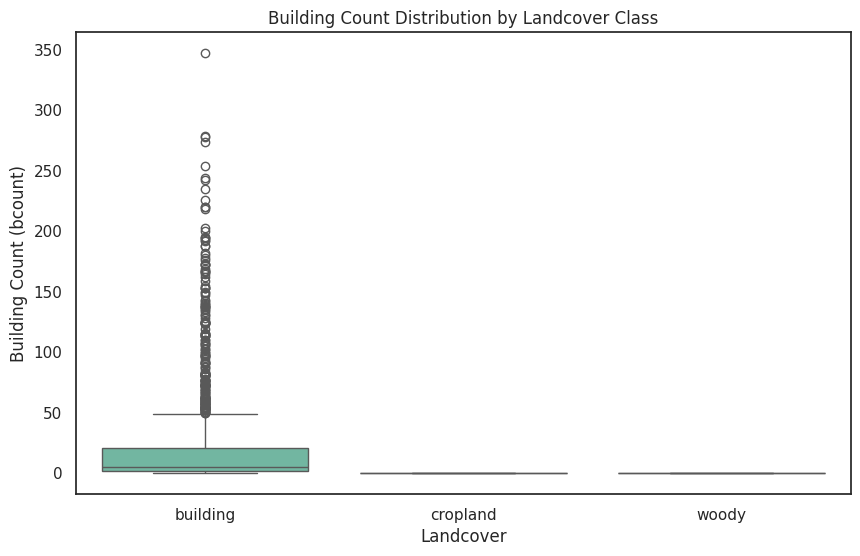

In [66]:
# Plot building count distribution by landcover
plt.figure(figsize=(10, 6))
sns.boxplot(x='landcover', y='bcount', data=train_gdf, palette='Set2')
plt.title("Building Count Distribution by Landcover Class")
plt.xlabel("Landcover")
plt.ylabel("Building Count (bcount)")
plt.show()

From the boxplot, building-labeled observations have notably higher building counts (bcount) than cropland or woody observations, which hover near zero. Several outliers in the building class extend beyond 50 or even 100, indicating some areas with exceptionally high building density. Meanwhile, cropland and woody vegetation cells generally have little to no buildings recorded.

## 4. What is the relationship between topography/soil properties and land cover?
in this we are looking at the role of Topography and Soil Characteristics, by exploring the slope and elevation(mdem) with respect to landcover.

<ipython-input-69-5bcd5ac4d6d3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='landcover', y='slope', data=train_gdf, palette='Pastel1')
<ipython-input-69-5bcd5ac4d6d3>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='landcover', y='mdem', data=train_gdf, palette='Pastel2')


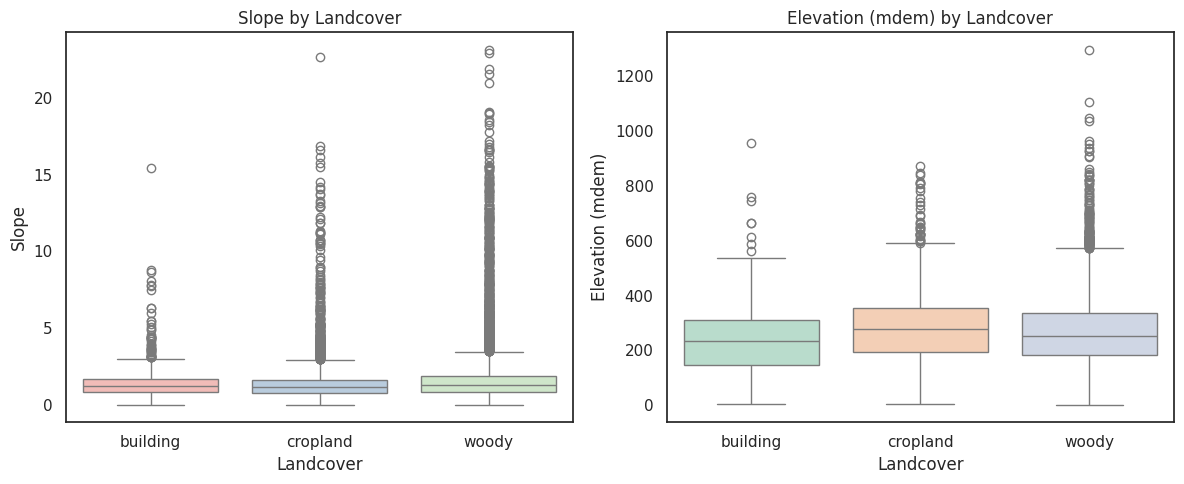

In [69]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='landcover', y='slope', data=train_gdf, palette='Pastel1')
plt.title("Slope by Landcover")
plt.xlabel("Landcover")
plt.ylabel("Slope")

plt.subplot(1, 2, 2)
sns.boxplot(x='landcover', y='mdem', data=train_gdf, palette='Pastel2')
plt.title("Elevation (mdem) by Landcover")
plt.xlabel("Landcover")
plt.ylabel("Elevation (mdem)")
plt.tight_layout()
plt.show()

From the slope boxplot (left panel):

* Buildings tend to occupy flatter areas, with lower median slope values and fewer outliers.

* Cropland has a slightly higher median slope than buildings, but still relatively moderate.

* Woody vegetation shows the highest range of slopes, suggesting that forested areas extend into steeper terrains.


From the elevation (mdem) boxplot (right panel):

* Building observations cluster around lower elevations overall.

* Cropland typically appears at mid-range elevations, higher than most building points.

* Woody vegetation spans the highest elevations among the three classes, indicating that forest cover persists in more elevated, possibly hilly or mountainous areas.

## Do the undocumented features (e.g., dnlt, nppm, sirs) add value?

To check if the undocumented features add any value, we will check their distributions and correlations with the target variable.

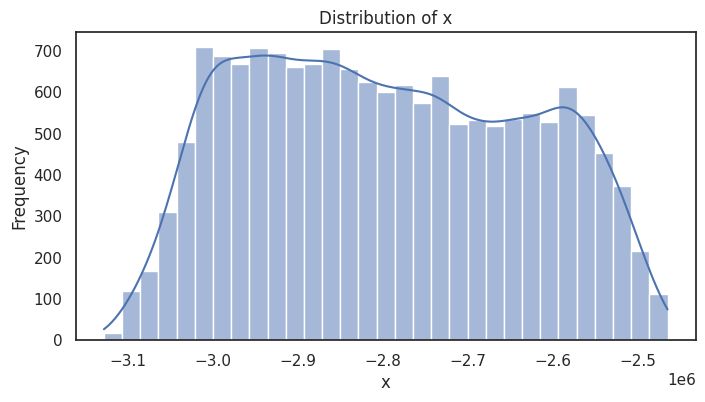

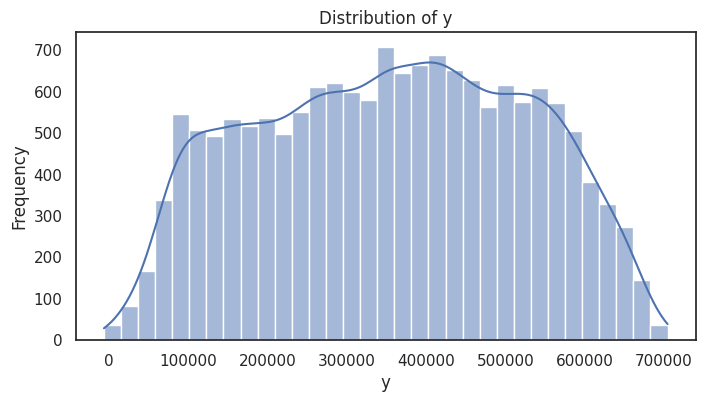

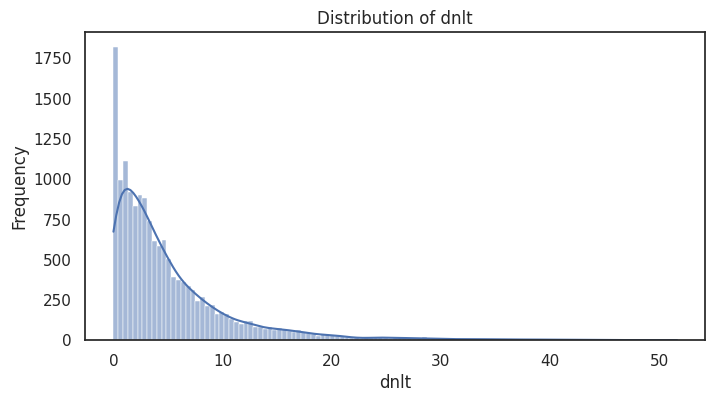

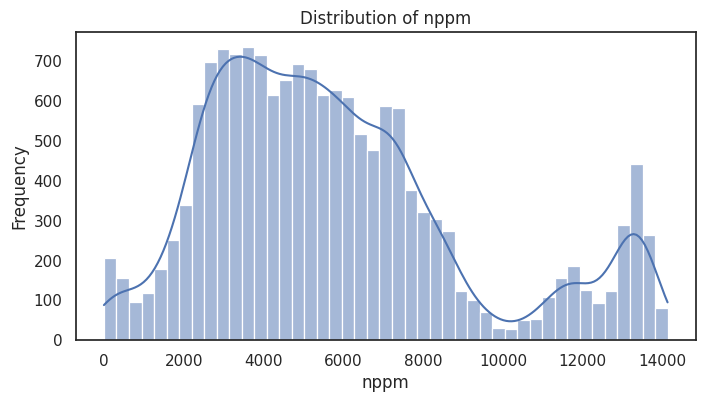

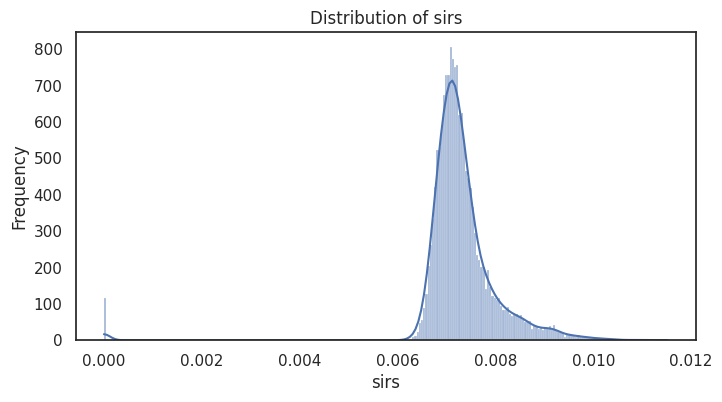

In [97]:
undoc_features = ['x','y','dnlt', 'nppm', 'sirs']
for feat in undoc_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_gdf[feat], kde=True)
    plt.title(f"Distribution of {feat}")
    plt.xlabel(feat)
    plt.ylabel("Frequency")
    plt.show()


x,y

* They both appear to have near-bell‐shaped or plateaued distributions, indicating the dataset covers a broad, continuous region in these projected coordinates ( assuming they are projected coordinates)

dnlt:
* It is Heavily right-skewed distribution, with a large spike near zero and a tail stretching up to 50.
This shape suggests most locations have very low dnlt values, but a minority of observations have significantly higher readings.

nppm:

* Exhibits multiple peaks (bimodal or multimodal).
Such a distribution could reflect different ecological or climatic zones with distinct levels of net primary productivity.
In land cover classification, nppm may help differentiate heavily vegetated (woody) areas from sparser cropland or built-up regions.

sirs:

* Very tight distribution around 0.006, with a few outliers near 0.0 and 0.01.
This narrow range means most locations share similar values, though small differences might still be relevant if they systematically separate classes.


In [99]:
for feat in undoc_features:
    corr_value = train_gdf[[feat, 'landcover_encoded']].corr().iloc[0, 1]
    print(f"{feat} correlation with landcover_encoded: {corr_value:.2f}")


x correlation with landcover_encoded: -0.01
y correlation with landcover_encoded: -0.03
dnlt correlation with landcover_encoded: 0.14
nppm correlation with landcover_encoded: 0.13
sirs correlation with landcover_encoded: 0.00


* x and y have low correlation, but despite this they may still help the model in non-linear ways—especially if certain land covers are more common in certain regions.

* dnlt & nppm: These moderately positive correlations confirm that higher values are more characteristic of the “woody” class, reinforcing their utility in distinguishing forested areas.

* sirs: No linear separation is evident